In [1]:
# code in chapter 14 of Python for Data Analysis
# Data Analysis Examples
# USA.gov Data from Bitly

In [2]:
path = 'example.txt'

In [3]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
import json
path = 'example.txt'
records = [json.loads(line) for line in open(path)]

In [5]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [6]:
records[0]['tz']

'America/New_York'

In [7]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [8]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [9]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [10]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # initialize values
    for x in sequence:
        counts[x] += 1
    return counts

In [11]:
someddict = defaultdict(int)
print(someddict[3])

0


In [12]:
someddict[3]

0

In [13]:
counts = get_counts(time_zones)

In [14]:
counts['America/New_York']

1251

In [15]:
len(time_zones)

3440

In [16]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [17]:
from collections import Counter

In [18]:
counts = Counter(time_zones)

In [19]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [20]:
# Counting Time Zones with pandas
import pandas as pd
import numpy as np

In [21]:
frame = pd.DataFrame(records)

In [22]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [23]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [24]:
tz_counts = frame['tz'].value_counts()

In [25]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

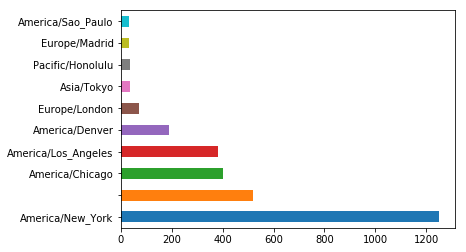

In [26]:
%matplotlib inline
tz_counts[:10].plot(kind='barh', rot=0)

In [27]:
import seaborn as sns

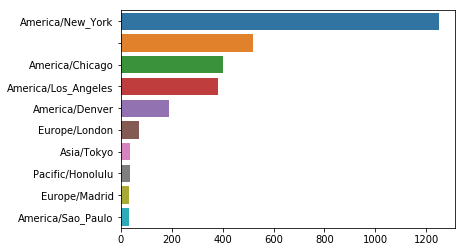

In [28]:
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

In [29]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [30]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [31]:
frame['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [32]:
frame['a'][:5]

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [33]:
results = Series([x.split()[0] for x in frame.a.dropna()])

NameError: name 'Series' is not defined

In [ ]:
results[:5]

In [34]:
results.value_counts()[:8]

NameError: name 'results' is not defined

In [35]:
cframe = frame[frame.a.notnull()]
cframe.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [36]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 
                            'Windows', 'Not Windows')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [38]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [39]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [40]:
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [41]:
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [42]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [43]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [44]:
# Rearrange the data for plotting
count_subset = count_subset.stack()
count_subset.head()

tz                 os         
America/Sao_Paulo  Not Windows    13.0
                   Windows        20.0
Europe/Madrid      Not Windows    16.0
                   Windows        19.0
Pacific/Honolulu   Not Windows     0.0
dtype: float64

In [45]:
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


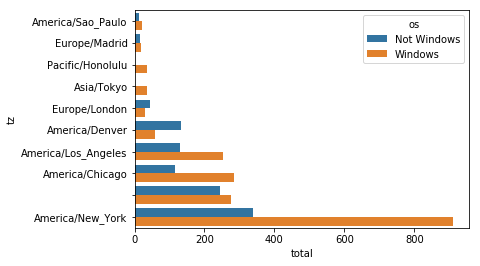

In [46]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

In [47]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)

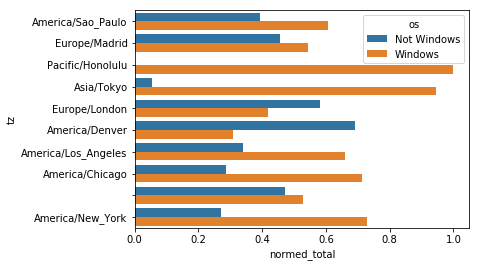

In [48]:
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

In [49]:
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')

In [50]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


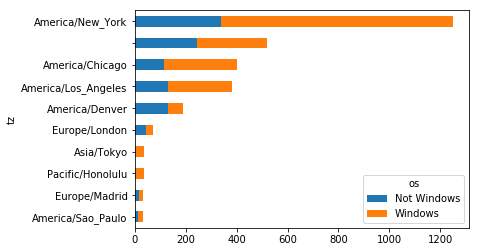

In [51]:
count_subset.plot(kind='barh', stacked=True)

In [52]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)

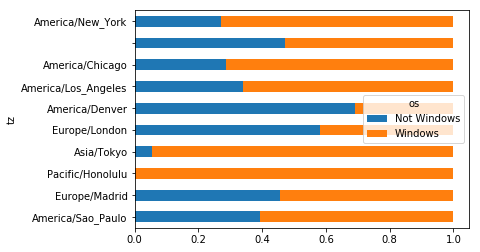

In [53]:
normed_subset.plot(kind='barh', stacked=True)

In [55]:
# MovieLens 1M Dataset
import pandas as pd

In [56]:
# Make display smaller
pd.options.display.max_rows = 10

In [60]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', 
                      header=None, names=unames, engine='python')

In [59]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None, names=rnames, engine='python')

In [61]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None, names=mnames, engine='python')

In [62]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [63]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [64]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [65]:
data = pd.merge(pd.merge(ratings, users), movies)

In [66]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [67]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [68]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

In [69]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [70]:
ratings_by_title = data.groupby('title').size()

In [71]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [72]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [73]:
print(active_titles)

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)


In [74]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [75]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [76]:
# Measuring Rating Disagreement
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [77]:
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
...,...,...,...
French Kiss (1995),3.535714,3.056962,-0.478752
"Little Shop of Horrors, The (1960)",3.650000,3.179688,-0.470312
Guys and Dolls (1955),4.051724,3.583333,-0.468391


In [78]:
# Reverse order of rows, take first 10 rows
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [81]:
# std
rating_std_by_title = data.groupby('title')['rating'].std()

In [82]:
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [83]:
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [ ]:
# US Baby Names 1880-2010
# Make display smaller
pd.options.display.max_rows = 10

In [84]:
names1880 = pd.read_csv('yob1880.txt', names=['names', 'sex', 'births'])

In [85]:
names1880

,names,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [86]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [88]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
# all data mergered in one dataset
names = pd.concat(pieces, ignore_index=True)

In [89]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [91]:
total_births = names.pivot_table('births', index='year',
                                columns='sex', aggfunc=sum)

In [92]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


In [93]:
import seaborn as sns
%matplotlib inline

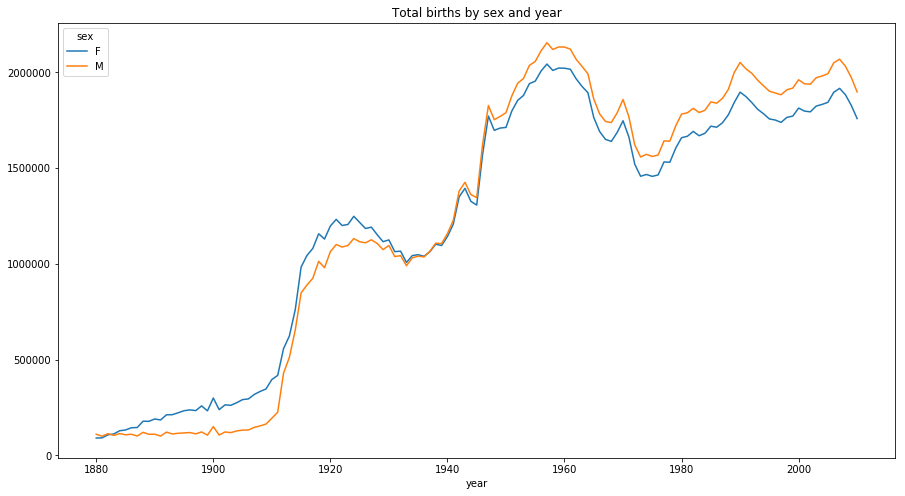

In [94]:
total_births.plot(title='Total births by sex and year', figsize=(15, 8))

In [95]:
def add_prop(group): 
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [96]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [97]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [98]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [99]:
pieces =[]
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
    
top1000 = pd.concat(pieces, ignore_index=True)

In [100]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [101]:
# Analyzing Naming Trends
boys = top1000[top1000.sex=='M']
girls = top1000[top1000.sex=='F']

In [102]:
total_births = top1000.pivot_table('births', index='year', 
                                   columns='name', aggfunc=sum)

total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [104]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a255d0b00>,
      dtype=object)

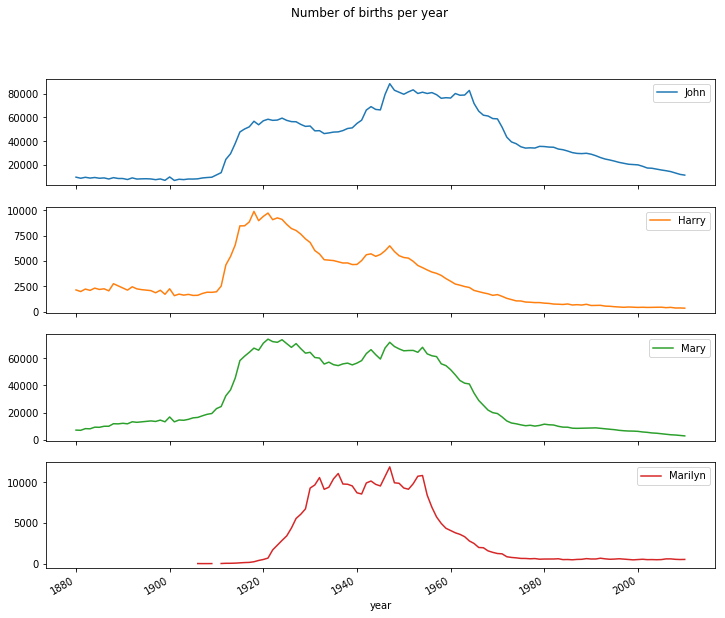

In [105]:
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

In [107]:
import numpy as np

In [108]:
table = top1000.pivot_table('prop', index='year',
                           columns='sex', aggfunc=sum)

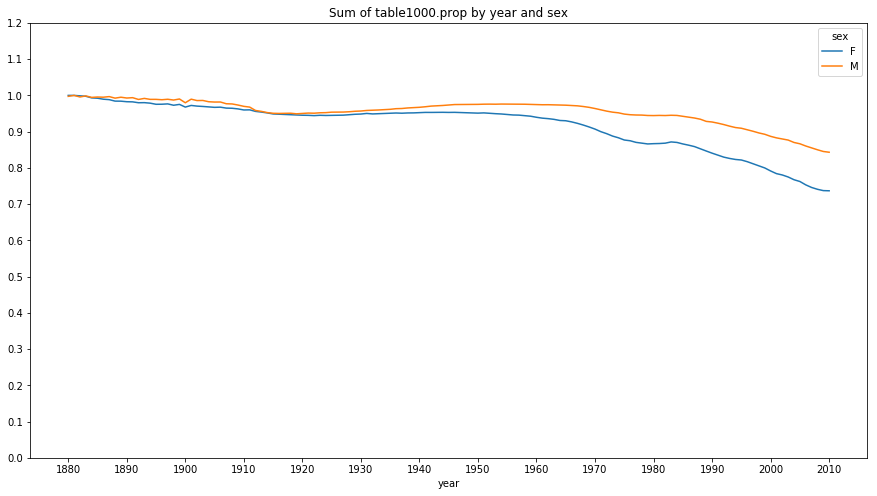

In [109]:
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10),
           figsize=(15, 8))

In [110]:
df = boys[boys.year == 2010]

In [111]:
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [112]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [113]:
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [114]:
prop_cumsum.searchsorted(0.5)

array([116])

In [115]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900[-10:]

41853    0.979223
41852    0.979277
41851    0.979330
41850    0.979383
41849    0.979436
41848    0.979489
41847    0.979542
41846    0.979595
41845    0.979648
41876    0.979702
Name: prop, dtype: float64

In [116]:
in1900.searchsorted(0.5) + 1

array([25])

In [117]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [118]:
diversity.head()

sex,F,M
year,,
1880,[38],[14]
1881,[38],[14]
1882,[38],[15]
1883,[39],[15]
1884,[39],[16]


In [119]:
diversity = diversity.astype('float')
diversity

sex,F,M
year,,
1880,38.0,14.0
1881,38.0,14.0
1882,38.0,15.0
1883,39.0,15.0
1884,39.0,16.0
...,...,...
2006,209.0,99.0
2007,223.0,103.0
2008,234.0,109.0


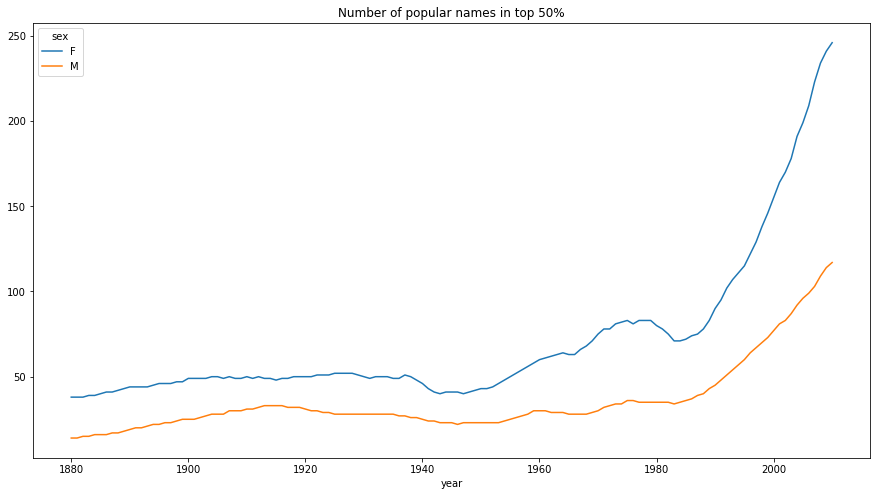

In [120]:
diversity.plot(title='Number of popular names in top 50%', figsize=(15, 8))

In [121]:
# change into gril's names
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [122]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [123]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')

table = table.div(table.sum(1), axis=0)

In [124]:
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN


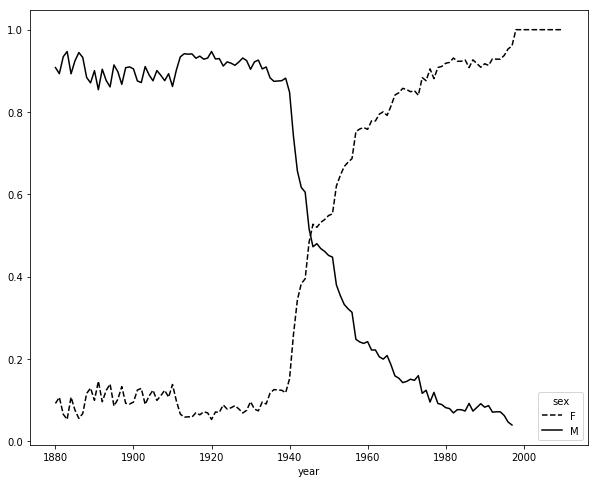

In [125]:
table.plot(style={'M': 'k-', 'F': 'k--'}, figsize=(10, 8))

In [126]:
# USDA Food Database
import json

In [127]:
pd.options.display.max_rows = 10

In [128]:
db = json.load(open('database.json'))
len(db)

6636

In [129]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [130]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [131]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients

,description,group,units,value
0,Protein,Composition,g,25.180
1,Total lipid (fat),Composition,g,29.200
2,"Carbohydrate, by difference",Composition,g,3.060
3,Ash,Other,g,3.280
4,Energy,Energy,kcal,376.000
...,...,...,...,...
157,Serine,Amino Acids,g,1.472
158,Cholesterol,Other,mg,93.000
159,"Fatty acids, total saturated",Other,g,18.584
160,"Fatty acids, total monounsaturated",Other,g,8.275


In [132]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [133]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [138]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

In [137]:
nutrients_all = pd.DataFrame()

for food in db:
    nutrients = pd.DataFrame(food['nutrients'])
    nutrients['id'] = food['id']
    nutrients_all = nutrients_all.append(nutrients, ignore_index=True)

In [136]:
nutrients_all

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
...,...,...,...,...,...
389350,"Vitamin B-12, added",Vitamins,mcg,0.000,43546
389351,Cholesterol,Other,mg,0.000,43546
389352,"Fatty acids, total saturated",Other,g,0.072,43546
389353,"Fatty acids, total monounsaturated",Other,g,0.028,43546


In [ ]:
nutrients_all.duplicated().sum() # number of duplicates

In [ ]:
nutrients_all = nutrients_all.drop_duplicates()
nutrients_all

In [ ]:
col_mapping = {'description': 'food',
               'group': 'fgroup'}

In [ ]:
nutrients_all = nutrients_all.rename(columns=col_mapping, copy=False)
nutrients_all

In [ ]:
ndata = pd.merge(nutrients_all, info, on='id', how='outer')
ndata.info()

In [ ]:
ndata.iloc[30000]

In [ ]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)

In [ ]:
%matplotlib inline

In [ ]:
result['Zinc, Zn'].sort_values().plot(kind='barh', figsize=(10, 8))

In [ ]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [ ]:
max_foods.loc['Amino Acids']['food']

In [139]:
# 2012 Federal Election Commission Database

In [ ]:
pd.options.display.max_rows = 10

In [ ]:
fec = pd.read_csv('P00000001-ALL.csv', low_memory=False)

In [ ]:
fec.info()

In [ ]:
fec.iloc[123456]

In [ ]:
unique_cands = fec.cand_nm.unique()
unique_cands

In [ ]:
unique_cands[2]

In [ ]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican', 
           'Gingrich, Newt': 'Republican', 
           'Huntsman, Jon': 'Republican', 
           'Johnson, Gary Earl': 'Republican', 
           'McCotter, Thaddeus G': 'Republican', 
           'Obama, Barack': 'Democrat', 
           'Paul, Ron': 'Republican', 
           'Pawlenty, Timothy': 'Republican', 
           'Perry, Rick': 'Republican', 
           "Roemer, Charles E. 'Buddy' III": 'Republican', 
           'Romney, Mitt': 'Republican', 
           'Santorum, Rick': 'Republican'}

In [ ]:
fec.cand_nm[123456:123461]

In [ ]:
fec.cand_nm[123456:123461].map(parties)

In [ ]:
# Add it as a column
fec['party'] = fec.cand_nm.map(parties)

In [ ]:
fec['party'].value_counts()

In [ ]:
(fec.contb_receipt_amt > 0).value_counts()

In [ ]:
fec = fec[fec.contb_receipt_amt > 0]

In [ ]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

In [ ]:
fec.contbr_occupation.value_counts()[:10]

In [ ]:
occ_mapping = { 
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED', 
    'INFORMATION REQUESTED' : 'NOT PROVIDED', 
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED', 
    'C.E.O.': 'CEO' 
}

# If no mapping provided, return x 
f = lambda x: occ_mapping.get(x, x) 
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [ ]:
fec.contbr_occupation

In [ ]:
emp_mapping = { 
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED', 
    'INFORMATION REQUESTED' : 'NOT PROVIDED', 
    'SELF' : 'SELF-EMPLOYED', 
    'SELF EMPLOYED' : 'SELF-EMPLOYED', 
}

# If no mapping provided, return x 
f = lambda x: emp_mapping.get(x, x) 
fec.contbr_employer = fec.contbr_employer.map(f)

In [ ]:
fec.contbr_employer

In [ ]:
by_occupation = fec.pivot_table('contb_receipt_amt', 
                                index='contbr_occupation',
                                columns='party',
                                aggfunc='sum')

In [ ]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

In [ ]:
import seaborn as sns
%matplotlib inline

In [ ]:
over_2mm.plot(kind='barh', figsize=(10, 8))

In [ ]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [ ]:
grouped = fec_mrbo.groupby('cand_nm')
grouped

In [ ]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

In [ ]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)